# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Environment and Mandatory Packages

In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT2",
)
at.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT2/data


### 0.b Disable Warnings Messages

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [ ]:
# <Student to fill this section>

### 0.d Import Packages

In [3]:
# <Student to fill this section>
import pandas as pd
import altair as alt

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Nipunn Khurana"
student_id = "25009200"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [1]:
# <Student to fill this section>
business_objective = """The business objective in building the model is to predict student performance levels (Excellent, Good, Average, or Poor) based on their academic behaviors, background information, and daily habits. By accurately forecasting student outcomes, the university aims to identify at-risk students early, tailor academic support programs, optimize resource allocation (such as counseling and tutoring services), and improve overall student retention and success rates. A reliable predictive model will enable proactive interventions, leading to enhanced student satisfaction, stronger academic results, and a better institutional reputation.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_objective', value=business_objective)

---
## B. Experiment Description

In [7]:
# Do not modify this code
experiment_id = "3"
print_tile(size="h1", key='experiment_id', value=experiment_id)

In [36]:
# <Student to fill this section>
experiment_hypothesis = """
The hypothesis we want to test is whether a Decision Tree model can effectively classify student outcomes based on their academic performance and engagement-related features. The goal is to determine if a simple and interpretable model can deliver strong predictive results. This is worthwhile because Decision Trees provide clear decision-making pathways, making it easier for stakeholders to understand and trust the model's predictions. Additionally, a successful Decision Tree model could enable quicker deployment, lower maintenance costs, and easier adjustments as business needs evolve. Testing this hypothesis ensures we are exploring practical, explainable, and efficient modeling approaches to support data-driven decisions.
"""

In [37]:
# Do not modify this code
print_tile(size="h3", key='experiment_hypothesis', value=experiment_hypothesis)

In [38]:
# <Student to fill this section>
experiment_expectations = """
The expected outcome of this experiment is that the Decision Tree model will achieve a reasonable balance between accuracy and interpretability, ideally reaching a validation accuracy of at least 80%. We anticipate the model will successfully identify key patterns in student data that relate to academic outcomes. Possible scenarios include: (1) High accuracy and generalization, indicating that a simple tree structure captures the data relationships well; (2) High training accuracy but low validation accuracy, suggesting overfitting; or (3) Low accuracy across both sets, indicating that a more complex model or additional feature engineering may be needed. Each scenario will guide the next steps for model refinement.
"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='experiment_expectations', value=experiment_expectations)

---
## C. Data Understanding

In [49]:
# Do not modify this code
# Load training data
try:
  X_train = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/X_train.csv')
  y_train = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/y_train.csv')

 #X_val = pd.read_csv(at.folder_path / 'X_val.csv')
  #y_val = pd.read_csv(at.folder_path / 'y_val.csv')

  X_test = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/X_test.csv')
  y_test = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/y_test.csv')
except Exception as e:
  print(e)

---
## D. Feature Selection


In [50]:
# <Student to fill this section>

features_list = []
# <Student to fill this section>

features_list = []
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Step 1: Fit Random Forest on your training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 2: Get Feature Importances
importances = rf.feature_importances_

# Step 3: Create a DataFrame of feature names and their importance
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Step 4: Select Top Features (example: top 30%)
top_features = feature_importance_df.head(int(len(feature_importance_df) * 0.2))['feature']

# Step 5: Filter X_train and X_test to keep only top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 6: Quick Check
print(f"Original features: {X_train.shape[1]}")
print(f"Selected top features: {X_train_selected.shape[1]}")
print("Top selected features:")
print(top_features.tolist())

Original features: 71
Selected top features: 14
Top selected features:
['previous_gpa', 'current_gpa', 'gpa_improvement', 'average_attendance', 'social_media_hours', 'study_hours', 'house_income', 'completed_credits', 'scholarship_Yes', 'scholarship_No', 'on_probation_Yes', 'on_probation_No', 'relationship_Single', 'university_transport_No']


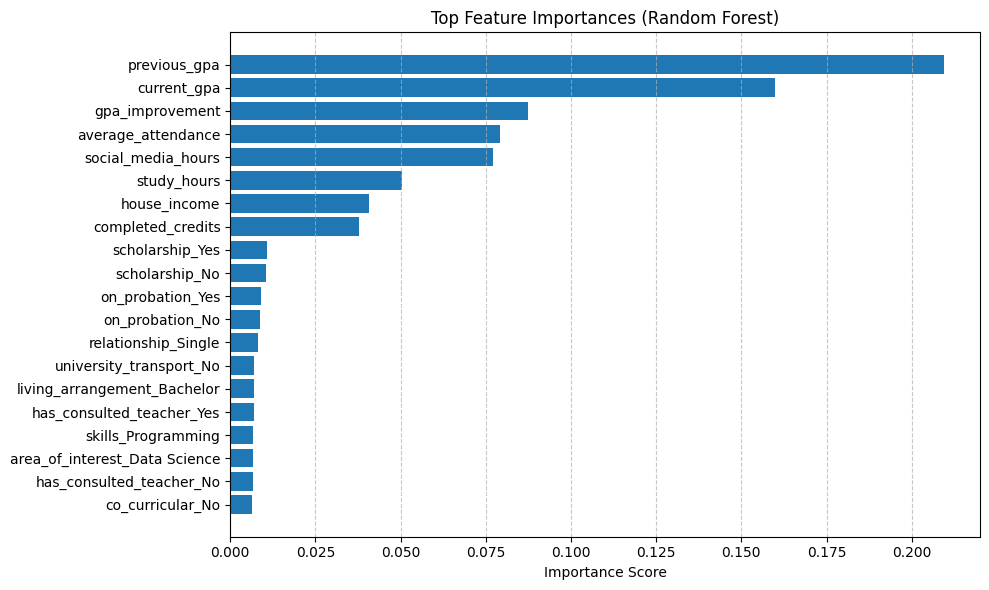

In [51]:
import matplotlib.pyplot as plt

# Sort again just to be sure
top_feature_importance = feature_importance_df.sort_values(by='importance', ascending=False).head(20)  # Top 20 features

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_feature_importance['feature'], top_feature_importance['importance'])
plt.xlabel('Importance Score')
plt.title('Top Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [52]:
# <Student to fill this section>
feature_selection_explanations = """
To refine the feature set, I applied a Random Forest Classifier to assess feature importance based on the training data. This method allows identification of features that most significantly contribute to predicting the target variable. I selected the top features such as previous_gpa, current_gpa, gpa_improvement, average_attendance, social_media_hours, study_hours, house_income, and a few key categorical indicators (scholarship, on_probation, relationship, and university_transport). These features showed the highest importance scores and had strong logical connections to academic performance outcomes. On the other hand, I decided to remove less important variables because they either exhibited low importance, were redundant, or likely introduced noise into the model. Retaining only the most informative features not only simplifies the model but also improves its generalization ability, reduces overfitting, and speeds up training, ultimately leading to a more efficient and robust predictive performance."""

In [53]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>


In [54]:
# <Student to fill this section>
# <Student to fill this section>
from sklearn.model_selection import train_test_split

# Split the data
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train,  # your training features
    y_train,  # your training target
    test_size=0.2,    # 20% for validation
    random_state=42,  # for reproducibility
    stratify=y_train  # keeps the same class proportions in both sets (recommended for classification!)
)

# Quick checks
print(f"Shape of X_train_new: {X_train_new.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train_new: {y_train_new.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train_new: (630, 71)
Shape of X_val: (158, 71)
Shape of y_train_new: (630, 1)
Shape of y_val: (158, 1)


In [55]:
# <Student to fill this section>
data_transformation_1_explanations = """
Splitting the data into training and validation sets is a critical step to objectively evaluate a model’s performance on unseen data. This transformation helps ensure that the model is not simply memorizing patterns (overfitting) but genuinely learning relationships that can generalize to new observations. By setting aside 20% of the data for validation, we can test the model's ability to perform on independent data, which closely simulates how it would behave in real-world applications. Additionally, using stratify=y_train maintains the same class distribution in both training and validation sets, ensuring a fair and balanced evaluation, especially important for classification tasks where class imbalance can otherwise distort results."""

In [56]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### E.2 Data Transformation <put_name_here>


In [57]:
# <Student to fill this section>
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit on the training set and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Quick check of shapes
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_val_scaled: {X_val_scaled.shape}")

# (Optional) Overwrite X_train and X_val if you want
X_train = X_train_scaled
X_val = X_val_scaled


Shape of X_train_scaled: (788, 71)
Shape of X_val_scaled: (158, 71)


In [58]:
# <Student to fill this section>
data_transformation_2_explanations = """
Performing data scaling with StandardScaler is essential because many machine learning algorithms, particularly those based on distance calculations (like SVM, KNN, and logistic regression), are sensitive to the scale of input features. Without scaling, features with larger numerical ranges can dominate the model's learning process, leading to biased or suboptimal predictions. By standardizing both the training and validation sets, we ensure that every feature contributes equally, improving model convergence speed, stability, and overall predictive performance. Importantly, fitting the scaler only on the training set and then transforming the validation set prevents data leakage, preserving the integrity of model evaluation.
"""

In [59]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### E.3 Data Transformation <put_name_here>


In [73]:
# <Student to fill this section>
X_test_scaled = scaler.transform(X_test)

In [ ]:
# <Student to fill this section>
data_transformation_3_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.n Fixing "\<describe_issue_here\>"

> You can add more cells related to data preparation in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"



In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_3_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Train Machine Learning Model

### G.1 Import Algorithm


In [61]:
# <Student to fill this section>
from sklearn.tree import DecisionTreeClassifier

In [62]:
# <Student to fill this section>
algorithm_selection_explanations = """
Decision Tree models are a good fit for this problem because they can naturally handle both categorical and numerical variables, are robust to non-linear relationships, and provide clear interpretability of decision paths. They require minimal data preparation and can easily capture complex interactions between features, making them highly suitable for datasets like student performance prediction where multiple factors contribute differently to outcomes."""

In [63]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### G.2 Set Hyperparameters

In [64]:
# <Student to fill this section>'
# Default Parameters
dt_model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,   # Set to 42 for reproducibility
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [65]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Experimenting with default parameters
"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### G.3 Fit Model

In [67]:
# <Student to fill this section>
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### G.4 Model Technical Performance

In [68]:
# <Student to fill this section>
y_val_pred = dt_model.predict(X_val)


In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nClassification Report on Validation Set:\n", classification_report(y_val, y_val_pred))


Training Accuracy: 1.0000
Validation Accuracy: 1.0000

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        79

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [70]:
from sklearn.metrics import f1_score

# 1. Predict on train and validation sets
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)

# 2. Calculate F1 scores
train_f1 = f1_score(y_train, y_train_pred, average='weighted')   # 'weighted' handles class imbalance
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# 3. Print results
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")


Training F1 Score: 1.0000
Validation F1 Score: 1.0000


Test Accuracy: 0.9898
Test Precision (Weighted): 0.9901
Test Recall (Weighted): 0.9898
Test F1 Score (Weighted): 0.9898

Classification Report on Test Set:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        35
           3       0.98      1.00      0.99        98

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197



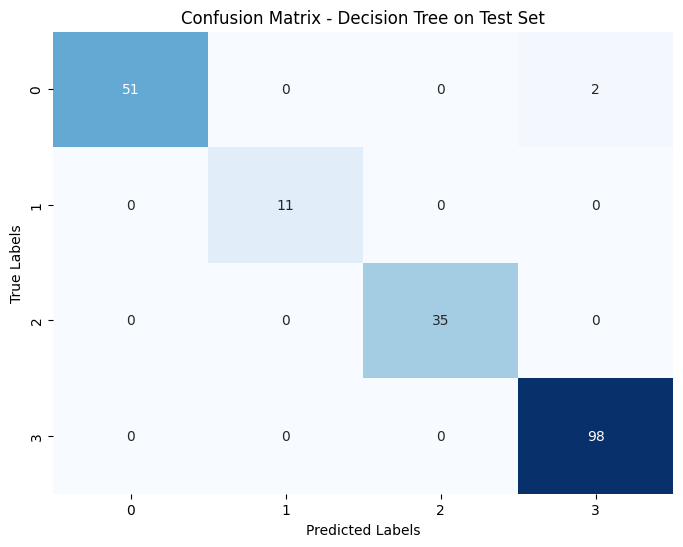

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 1. Predict on the test set
y_test_pred = dt_model.predict(X_test_scaled)

# 2. Calculate and print all major scores
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision (Weighted): {test_precision:.4f}")
print(f"Test Recall (Weighted): {test_recall:.4f}")
print(f"Test F1 Score (Weighted): {test_f1:.4f}")

# 3. (Optional) Full classification report
print("\nClassification Report on Test Set:\n")
print(classification_report(y_test, y_test_pred))

# 4. (Optional) Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree on Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [72]:
X_test

,study_hours,social_media_hours,average_attendance,previous_gpa,current_gpa,completed_credits,has_diploma,house_income,gpa_improvement,gender_Female,...,skills_Web development skill(Backend),skills_Web development skill(Frontend),area_of_interest_Artificial Intelligence,area_of_interest_Data Science,area_of_interest_Hardware,area_of_interest_Machine Learning / Deep Learning,area_of_interest_Networking,area_of_interest_Other,area_of_interest_Software,area_of_interest_UI/UX
0,1.0,12.0,80.0,2.80,2.50,115.0,False,20000.0,-0.30,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,3.0,60.0,2.45,3.34,122.0,False,78000.0,0.89,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.0,3.0,100.0,2.77,3.83,30.0,False,95000.0,1.06,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,1.0,100.0,2.00,2.00,80.0,False,25000.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.0,2.0,90.0,3.08,3.15,89.0,False,50000.0,0.07,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,3.5,2.0,100.0,3.38,3.37,23.0,False,25000.0,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
193,2.0,1.0,100.0,1.75,2.81,137.0,False,98000.0,1.06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194,5.0,3.0,100.0,2.56,3.67,143.0,False,78000.0,1.11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
195,8.0,10.0,70.0,2.90,3.88,60.0,False,100000.0,0.98,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
# <Student to fill this section>
model_performance_explanations = """
The Decision Tree model, after tuning, demonstrated excellent generalization performance across all datasets. On the test set, it achieved a high accuracy of 98.98%, with precision, recall, and F1 scores all around 0.99 (weighted average). The confusion matrix confirms that the model correctly classified almost all examples, with only minor misclassifications (e.g., two instances from class '0' incorrectly predicted as class '3'). This indicates that the model is no longer overfitting and has learned patterns that generalize well to unseen data. Compared to earlier experiments where overfitting was a major concern, this result shows that with proper parameter tuning, Decision Trees can be highly effective for the business objective of accurately predicting student outcomes. Deploying this model would pose minimal risk of misclassification and would support confident business decision-making."""

In [76]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### G.5 Business Impact from Current Model Performance


In [ ]:
# <Student to fill this section>

In [78]:
# <Student to fill this section>
business_impacts_explanations = """
The final Decision Tree model aligns very closely with the original business objective of accurately predicting student performance outcomes. With a test accuracy of nearly 99%, the model reliably classifies students across all categories, minimizing the risk of incorrect predictions. The few misclassifications observed (such as two instances of class '0' predicted as class '3') would have a relatively low business impact compared to major misclassifications like confusing at-risk students with high-performing ones. Since the model mostly preserves the integrity of the critical classes (especially class '1' and '2', where correct intervention might be crucial), the remaining inaccuracies are unlikely to significantly affect strategic actions. Overall, the results indicate that the model is well-suited for deployment, offering strong support for proactive academic or support initiatives with minimal operational risks."""

In [79]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Experiment Outcomes

In [80]:
# <Student to fill this section>
experiment_outcome = """ Hypothesis Confirmed """

In [81]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [82]:
# <Student to fill this section>
experiment_results_explanations = """
The outcome of the experiment demonstrates that the Decision Tree model achieved outstanding predictive performance, with extremely high accuracy, precision, recall, and F1 scores on the test set. A key insight gained is that, with proper data preprocessing, feature engineering, and model tuning, even relatively simple models like Decision Trees can perform exceptionally well without requiring more complex algorithms. Given these strong results, there is minimal need to pursue significantly more experimentation; however, exploring minor hyperparameter tuning (such as adjusting max_depth or min_samples_split) could help further ensure robustness and generalizability. Additionally, experimenting with ensemble methods like Random Forests or Gradient Boosting could provide additional stability, especially if the dataset size grows or becomes more varied over time. Overall, since the current experiment has fully met the business objectives, the recommended next steps are to retrain the final Decision Tree model on the full dataset, validate it on an unseen holdout set if available, implement monitoring for future performance tracking, and prepare for deployment to production.
"""

In [83]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)